# DATA VISUATIZATION

# Importing libraries



Loading And Reshaping the Data
    • Load and read the image data
    • Note datatypes
    • two columns in this project - data and labels.
the pixel value data for each 80x80 RGB image is stored as a list of 19200 integers within the data list. The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue.
    • No of ship and no-ship images noted

    • Turning the json information into numpy array and then assign it as x and y variables
    • Note x shape

    • Reshaping the data
    
(The current data for each image is one row of flattened 19200 data points representing the RGB values of each pixel. So we need to reshape it. After reshaping, each item in new x variable will be 3 lists. Each of these lists will be RGB values for each pixel for the length and width of the image.)
    • New modified shape noted
    • Same done for y, but y variable consist of label values, 1 or 0. We need to convert them binary class matrix.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import expand_dims
import json
import seaborn as sns
import os, random, cv2, pickle, json, itertools


from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.utils import class_weight
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Add, Input, Conv2D, Dropout, Activation, BatchNormalization, MaxPool2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# **Loading And Reshaping the Data**

In [2]:
with open('../input/ships-in-satellite-imagery/shipsnet.json') as data_file:
    dataset = json.load(data_file)
shipsnet= pd.DataFrame(dataset)
shipsnet.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [3]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


> We need just two columns in this project which are data and labels.
> 

In [4]:
shipsnet = shipsnet[["data", "labels"]]
shipsnet.head()

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


In [5]:
len(shipsnet["data"].iloc[0])

19200

As you can see, the pixel value data for each 80x80 RGB image is stored as a list of 19200 integers within the data list. The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue.

In [6]:
ship_images = shipsnet["labels"].value_counts()[1]
no_ship_images = shipsnet["labels"].value_counts()[0]
print("Number of the ship_images :{}".format(ship_images),"\n")
print("Number of the no ship_images :{}".format(no_ship_images))

Number of the ship_images :1000 

Number of the no ship_images :3000


In [7]:
# Turning the json information into numpy array and then assign it as x and y variables
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [8]:
x.shape

(4000, 19200)

The current data for each image is one row of flattened 19200 data points representing the RGB values of each pixel. So we need to reshape it. After reshaping, each item in new x variable will be 3 lists. Each of these lists will be RGB values for each pixel for the length and width of the image.

In [9]:
x_reshaped = x.reshape([-1, 3, 80, 80])
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

y variable consist of label values, 1 or 0. We need to convert them binary class matrix.

In [10]:
y.shape

(4000,)

In [11]:
y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [12]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## **DATA VISUALISATION**
# **PIXEL INTENSITY**

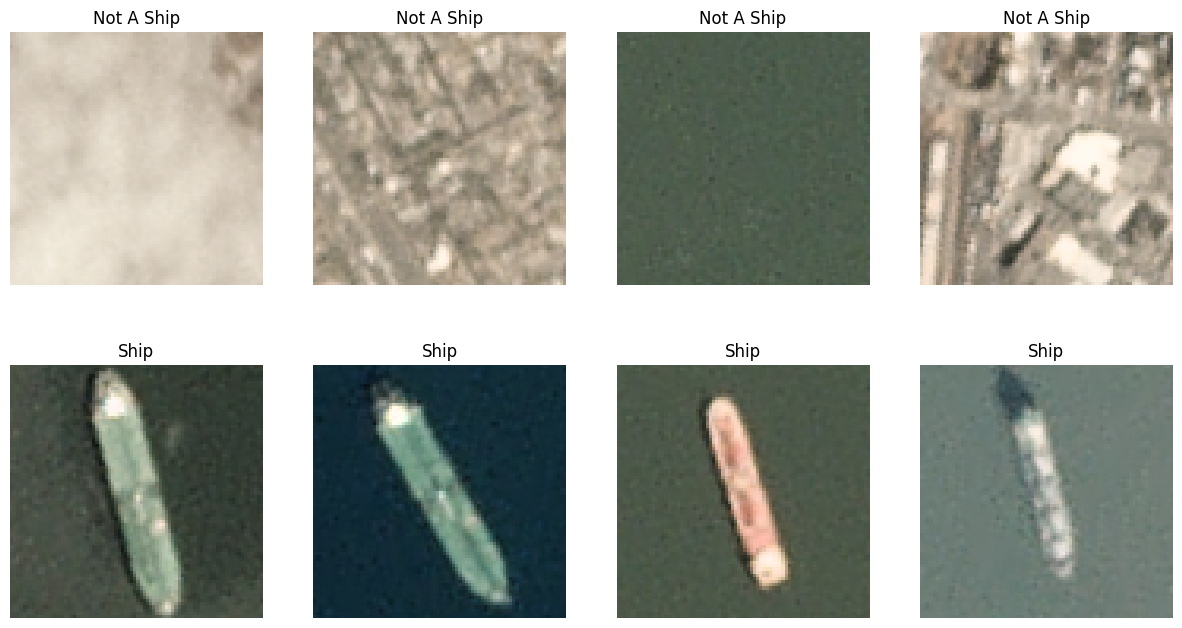

In [13]:
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):
    
    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])
            plt.axis("off")
            
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

#Implementation of the function 

plot(image_no_ship, image_ship)

In [14]:
def plotHistogram(ship, not_ship):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(ship)
    plt.axis('off')
    plt.title('Ship')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(ship.min()))
    print("Maximum pixel value of this image: {}".format(ship.max()))
    plt.figure(figsize = (10,7))
    plt.subplot(2,2,3)
    plt.imshow(not_ship)
    plt.axis('off')
    plt.title('Not A Ship')
    histo = plt.subplot(2,2,4)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(not_ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(not_ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(not_ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(not_ship.min()))
    print("Maximum pixel value of this image: {}".format(not_ship.max()))


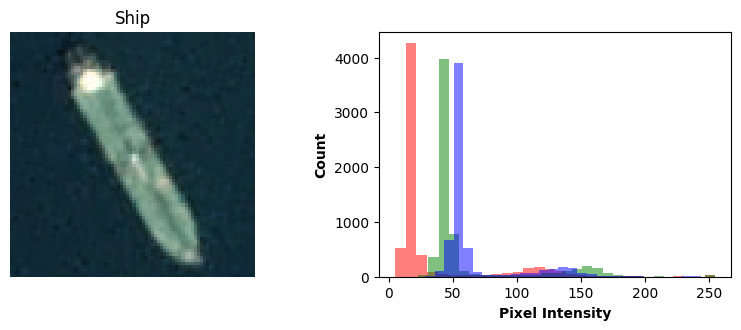

Minimum pixel value of this image: 5
Maximum pixel value of this image: 255


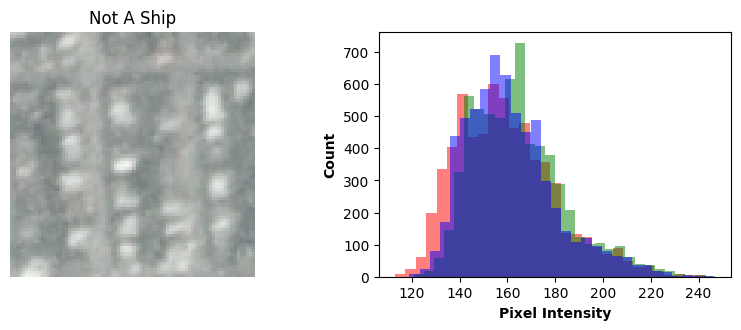

Minimum pixel value of this image: 113
Maximum pixel value of this image: 247


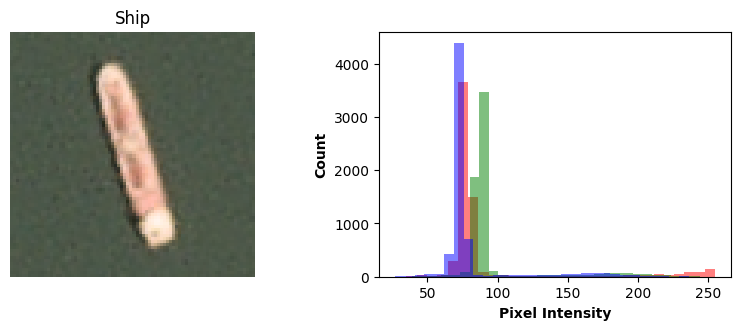

Minimum pixel value of this image: 27
Maximum pixel value of this image: 255


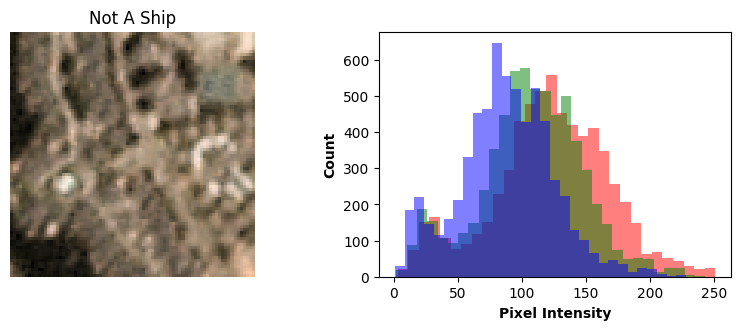

Minimum pixel value of this image: 1
Maximum pixel value of this image: 251


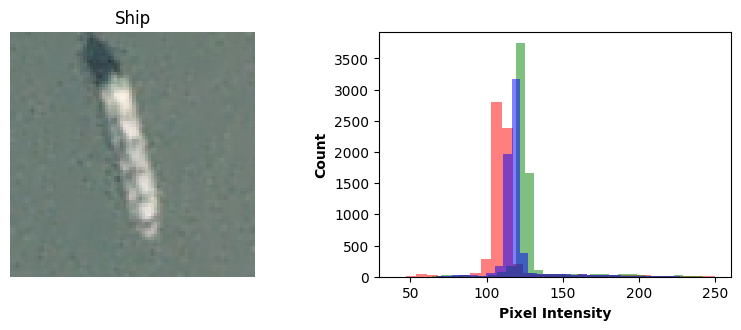

Minimum pixel value of this image: 40
Maximum pixel value of this image: 250


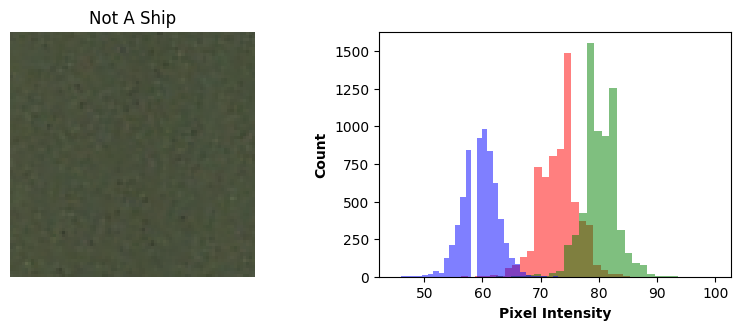

Minimum pixel value of this image: 45
Maximum pixel value of this image: 100


In [15]:
#Implementation of the function
for i in range (20,23):
    plotHistogram(x_reshaped[y==1][i], x_reshaped[y==0][i])

# **CHANNEL VIEW**

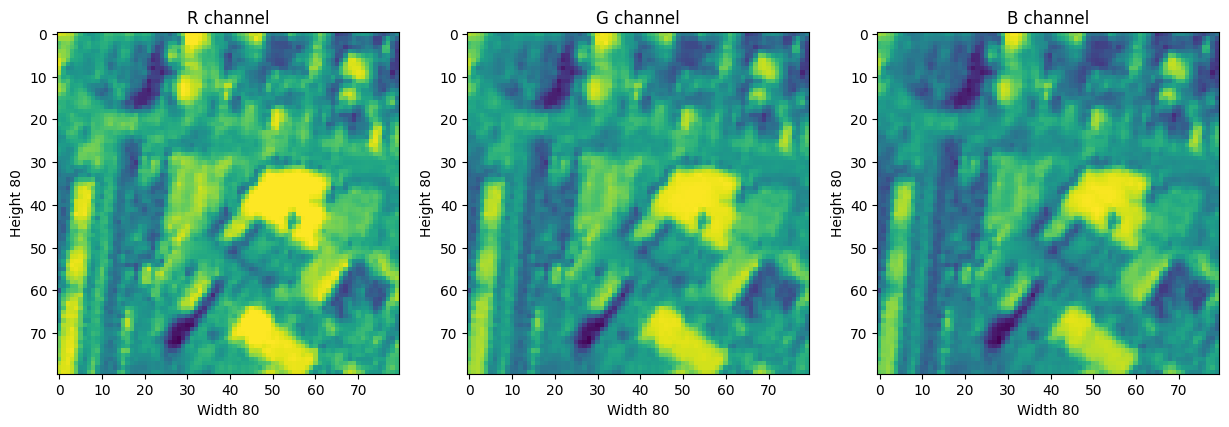

In [16]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==0][5][ : , : , i])

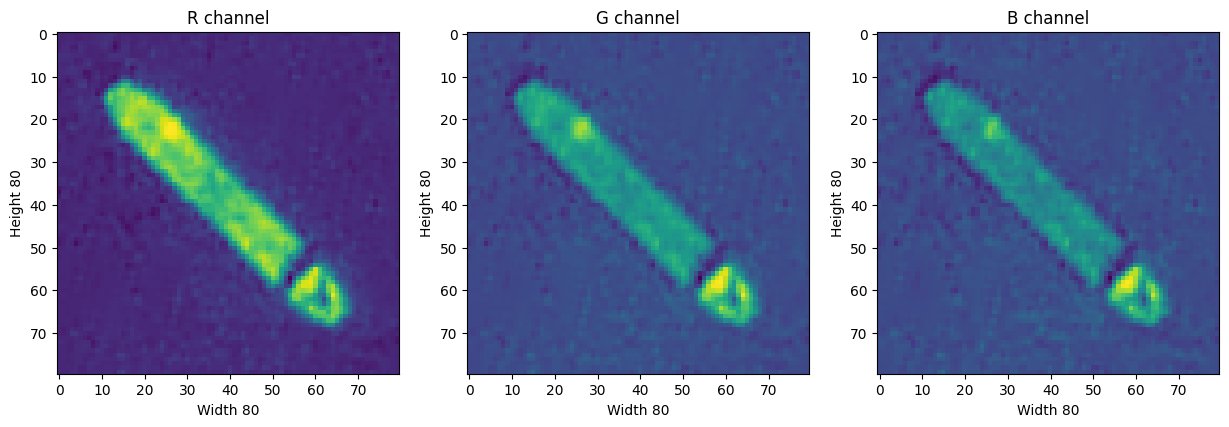

In [17]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==1][5][ : , : , i])

# **MODELING**
Preparing of Train and Test Data

* First step is normalizing x data.

In [18]:
x_reshaped = x_reshaped / 255

In [19]:
x_reshaped[0][0][0] # Normalized RGB values of the firs pixel of the first image in the dataset.


array([0.32156863, 0.36862745, 0.31372549])

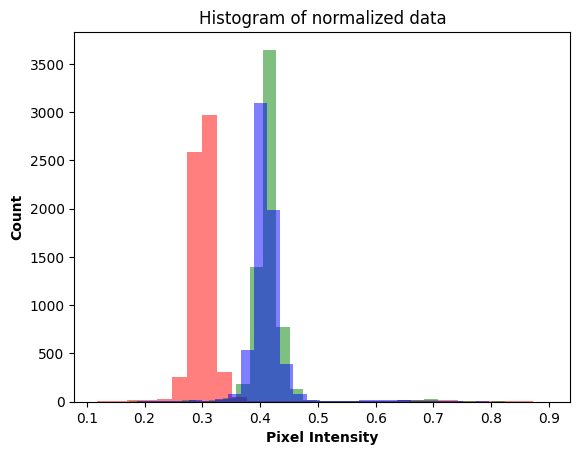

In [20]:
n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram of normalized data")
plt.show()

* Data is ready for splitting as train and test.

In [21]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, 
                                                  test_size = 0.25, random_state = 42)


print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)



x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 80, 80, 3)
y_test shape (800, 2)


# **ANN IMPLEMENTATION**

In [22]:
from keras import callbacks
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [earlystopping])


Epoch 1/100
75/75 [==============================] - 3s 35ms/step - loss: 1.3945 - accuracy: 0.7533 - val_loss: 0.4724 - val_accuracy: 0.8438
Epoch 2/100
75/75 [==============================] - 2s 29ms/step - loss: 0.5326 - accuracy: 0.8267 - val_loss: 0.3973 - val_accuracy: 0.8575
Epoch 3/100
75/75 [==============================] - 2s 29ms/step - loss: 0.5519 - accuracy: 0.8154 - val_loss: 0.6708 - val_accuracy: 0.8225
Epoch 4/100
75/75 [==============================] - 2s 28ms/step - loss: 0.3296 - accuracy: 0.8767 - val_loss: 0.4714 - val_accuracy: 0.8163
Epoch 5/100
75/75 [==============================] - 2s 30ms/step - loss: 0.2943 - accuracy: 0.8850 - val_loss: 0.5814 - val_accuracy: 0.7325
Epoch 6/100
75/75 [==============================] - 2s 29ms/step - loss: 0.2764 - accuracy: 0.8896 - val_loss: 0.2838 - val_accuracy: 0.9025
Epoch 7/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2793 - accuracy: 0.8946 - val_loss: 0.2433 - val_accuracy: 0.9000
Epoch 

In [23]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.2087 - accuracy: 0.9212


[0.20873770117759705, 0.9212499856948853]

In [24]:
plot_model(model,to_file='ANN_model.png')
SVG(model_to_dot(model).create(prog='dot',format='svg'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 200)               3840200   
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 2)                 302       
                                                                 
Total params: 3,870,652
Trainable params: 3,870,652
Non-trainable params: 0
_________________________________________________________________


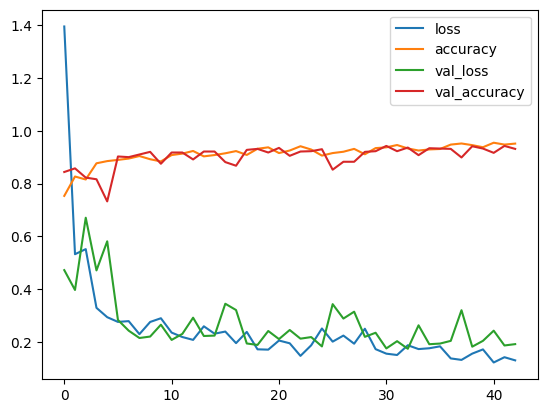

In [25]:
pd.DataFrame(history.history).plot();

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 16.8 MB/s eta 0:00:00a 0:00:01


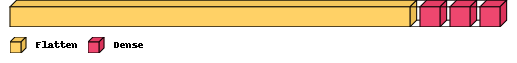

In [26]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)